In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2
from PIL import Image 
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist 
from tensorflow.math import  confusion_matrix


In [3]:
# loading dataset 

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [4]:
# shape of numpy array 

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images
Test data  = 10000 images 

Image dimension --> 28x28
Grayscale Image --> 1 channel

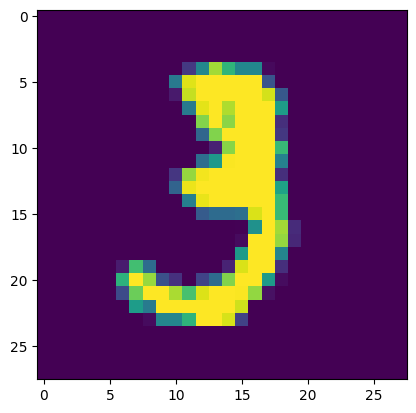

In [5]:
# displaying the image 
plt.imshow(X_train[10])
plt.show()

In [6]:
# unique values in Y_train 
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have same dimensions in the dataset if not,we have to resize all the images to a common dimension

In [7]:
# scaling values 

X_train = X_train/255
X_test = X_test/255

Building the Neural Network

In [10]:
# setting layers of neural network 

model = keras.Sequential( [
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]

)

In [13]:
# compiling the Neural Network

model.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy']
)



In [14]:
# training neural network

model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9121 - loss: 0.3076
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9572 - loss: 0.1439
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9689 - loss: 0.1039
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0811
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9798 - loss: 0.0667
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0554
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0458
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0390
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9889 - loss: 0.0340
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0294


Trainig data accuracy = 99%

In [15]:
# accuracy on test data

loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1174
0.9708999991416931


Test data accuracy = 97%

In [16]:
Y_pred = model.predict(X_test)
print(Y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[6.6574207e-03 1.0384079e-03 3.4330931e-01 5.5972284e-01 2.0969315e-05
 2.3122784e-03 2.8199698e-11 9.9999660e-01 1.3843069e-02 6.8397230e-01]


model.predict() gives the prediction probability of each class for that data point

In [17]:
# converting prediction probabilities to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [19]:
# converting prediction probabilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(4), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test --> True labels 
Y_pred_labels --> Predicted labels

In [21]:
# confusion matrix

conf_mat = confusion_matrix(Y_test,Y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted labels')

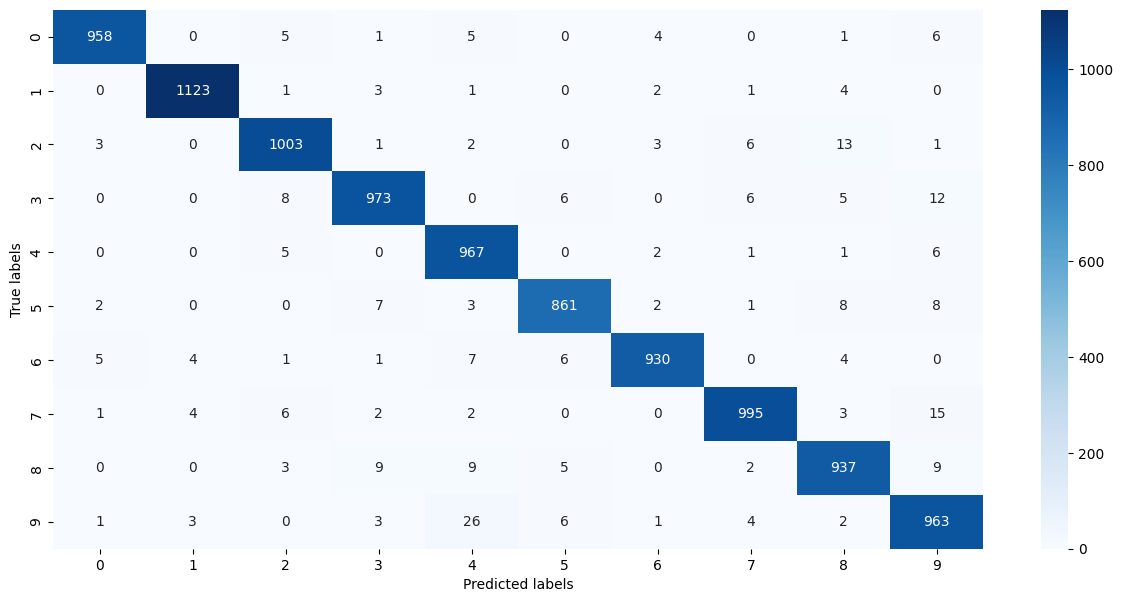

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')


In [26]:
# building predictive system

input_image = cv2.imread('mnist1.png')





In [27]:
type(input_image)

numpy.ndarray

(np.float64(-0.5), np.float64(476.5), np.float64(378.5), np.float64(-0.5))

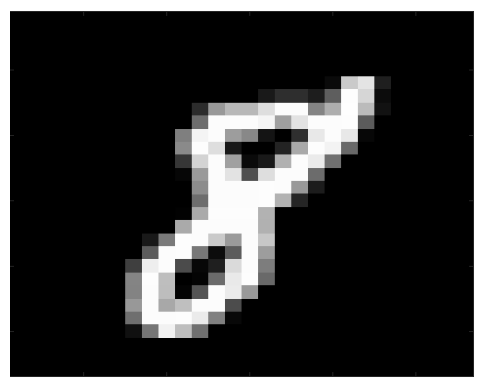

In [30]:

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis("off")


In [31]:
input_image.shape

(379, 477, 3)

In [32]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [33]:
grayscale.shape

(379, 477)

In [34]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [35]:
input_image_resize.shape

(28, 28)

In [36]:
input_image_resize = input_image_resize/255

In [37]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [38]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
[[2.0122546e-04 6.4245319e-01 2.7390055e-03 1.6834222e-04 8.6342883e-01
  7.3996565e-04 3.1987136e-06 1.2961274e-02 9.9999553e-01 1.5561827e-01]]


In [39]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

8


Predictive System

In [40]:
input_image_path = input('Path of image to be predicted')
input_image = cv2.imread(input_image_path)
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize,[1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ',input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The Handwritten Digit is recognised as  8
